In [68]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    cross_val_predict,
    KFold)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn import metrics

## Load data

In [15]:
# load visual features
visual_features = pd.read_csv('../Py-Feat-main/video_features.csv', index_col=0)

# load labels
labels = pd.read_csv('../Py-Feat-main/labels.csv', index_col=0, delimiter=';')

# load speech to text features

Merge the different feature sets with the corresponding labels

In [22]:
merged_df = labels.reset_index().merge(visual_features.reset_index(), left_on="VideoID", right_on="video_id").drop(columns='VideoID')

In [24]:
merged_df.head()

,Sponsored,Sentiment,video_id,anger,disgust,fear,happy,neutral,sad,surprise,total_mean,negative_mean
0,Yes,Postive,7215716180294683946,0.010000,0.150000,0.170000,0.340000,0.770000,0.590000,0.330000,0.337143,0.230000
1,Yes,Positive,7210487841732840746,0.012195,0.658537,0.243902,0.085366,0.878049,0.219512,0.573171,0.381533,0.283537
2,Yes,Positive,7218032675850849582,0.035714,0.375000,0.178571,0.035714,0.785714,0.339286,0.678571,0.346939,0.232143
3,Yes,Positive,7102205817524555054,0.025000,0.100000,0.175000,0.250000,0.575000,0.600000,0.125000,0.264286,0.225000
4,Yes,Positive,7220512664575986990,0.000000,0.823529,0.235294,0.058824,0.882353,0.529412,0.294118,0.403361,0.397059


## Split data


In [27]:
# Load label
y = merged_df.Sentiment.replace({'Positive': 1, 'Postive': 1, 'Neutral': 0, 'Negative': 0})

# load features
X = merged_df[['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise', 'total_mean', 'negative_mean']]

### Rerun based on 5 different splits for cross validation

In [94]:
clf = SVC(kernel='rbf', random_state=24, gamma='scale', probability=True)
cv = KFold(n_splits=5, random_state=24, shuffle=True)

# load predictions
y_pred = cross_val_predict(clf, X, y, cv=cv)
y_pred_prob_a = cross_val_predict(clf, X, y, cv=cv, method='predict_proba')

# print overal score
scores = cross_val_score(clf, X, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.75 accuracy with a standard deviation of 0.07


### Plot confusion matrix

In [95]:
cm = metrics.confusion_matrix(y, y_pred)

<Axes: >

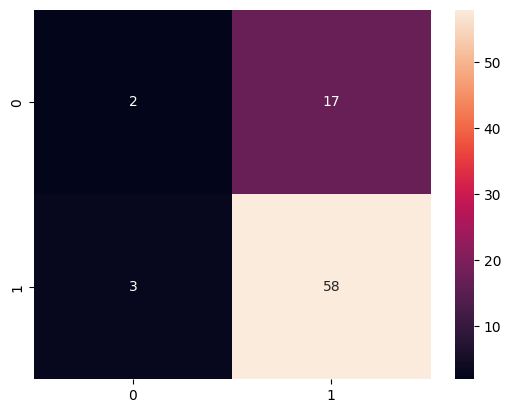

In [96]:
sns.heatmap(cm, annot=True)